In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [1]:
import io
import collections
import networkx as nx # `pip install networkx`
import pygraphviz as pv # `brew install graphviz; pip install pygraphviz`
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import rankdata
from PIL import Image
from IPython.core.display import SVG, display

/var/folders/lq/3gs1y9g56k117kt2zsl1bfx80000gn/T/ipykernel_8531/3870878628.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import SVG, display


In [2]:
"""
Functions for Burrows–Wheeler transform
"""
def get_suffix_array(seq):
    """
    return suffix array of (i, string)
    """
    return sorted([((seq[i:] + seq[:i]),i) for i in range(len(seq))])

def get_bwt(seq):
    """
    returns bwt (f, l) for given sequence
    """
    sa = get_suffix_array(seq)
    return [x[0][1] for x in sa], [x[0][-1] for x in sa]

In [3]:
"""
Functions for De Bruijn Graph
"""

def get_kmers(seq, k):
    """ 
    returns k-mers of seqs
    """
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

def get_debruijn(sequences : list, k = 3):
    """
    returns debruijn networkX Graph
    """
    G = nx.MultiDiGraph()
    colors = ["darkorange","red","blue","crimson","cyan"] if len(sequences) > 1 else ["black"]
    for i, seq in enumerate(sequences):
        edges = set()
        for edge in [get_kmers(km, k-1) for km in get_kmers(seq, k)]:
            edges.add(tuple(edge))
        _ = G.add_edges_from(edges ,color=colors[i])
    return G

def draw_debruijn(G, full=True):
    """
    draw debruijn graph
    """
    if full:
        xd = nx.nx_agraph.to_agraph(G)
        image = Image.open(io.BytesIO(xd.draw(prog='dot',format='png')))
        image.save("graph.png")
        
        svg = nx.nx_agraph.to_agraph(G).draw(prog='dot',format='svg')
        display(SVG(svg))
    else:
        # using neato for condensed graph
        pg = nx.nx_agraph.to_agraph(G)
        pg.graph_attr.update(overlap="false")
        pg.graph_attr.update(splines="true")
        image = Image.open(io.BytesIO(pg.draw(prog='neato',format='png')))
        image.save("graph.png")
        
        svg = pg.draw(prog='neato',format='svg')
        display(SVG(svg))

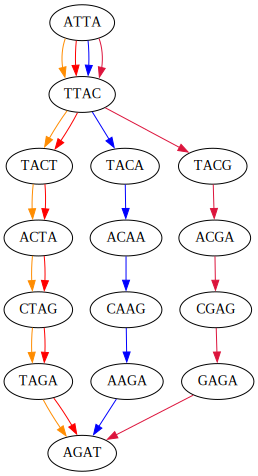

In [6]:
"""
Example Usage 
"""
G = get_debruijn(sequences = ["ATTACTAGAT","ATTACTAGAT","ATTACAAGAT","ATTACGAGAT"], k = 5)
draw_debruijn(G, full=True)

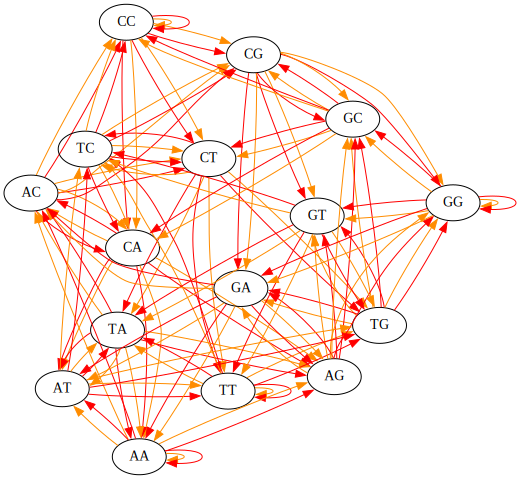

In [8]:
# """
# Example Usage from file
# """
# with open("s3_GCA_000292405.fasta") as fd:
#     next(fd)
#     data1 = fd.read().replace("\n","")

# with open("s4_GCA_000292445.fasta") as fd:
#     next(fd)
#     data2 = fd.read().replace("\n","")
    
# k = 4
# sequences = [data1,data2]

# G = get_debruijn(sequences)
# draw_debruijn(G, full=False)

In [8]:
"""
Exploratory work for Wheeler Graphs
"""
def get_wheeler(sequences):
    n = len(sequences[0])

    # combine sequences into edges
    edge_chars = [set() for _ in range(n)]
    edge_strings = [set() for _ in range(n)]
    for seq in sequences:
        for i in range(n):
            edge_strings[i].add(seq[i:])
            edge_chars[i].add(seq[i])

    # get node labels by sorting edge strings
    edge_strings = [list(x) for x in edge_strings]
    edge_chars = [list(x) for x in edge_chars]
    nodes = [r - 1 for r in rankdata(edge_strings, method='dense')]
    
    G = nx.MultiGraph()
    G.add_nodes_from(nodes) 
    for i in range(1, len(nodes)):
        G.add_edge(nodes[i-1], nodes[i], label = edge_chars[i])
    return G

def draw_wheeler(G):
    svg = nx.nx_agraph.to_agraph(G).draw(prog='dot',format='svg')
    display(SVG(svg))

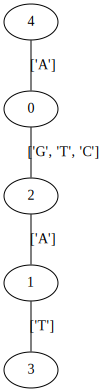

In [10]:
G = get_wheeler(sequences = ["TACAT","TAGAT","TATAT"])
draw_wheeler(G)